# What I want to showcase
* usage of scikit-learn pipelines
* 

In [1]:
# importing python files inside a jupyter notebook is tricky. 
import sys  
sys.path.insert(0, '/home/henri/Documents/Post Lighthouse-Lab work/streamlitWebsiteCVProject/projects')

from customPandas import *


In [2]:
dbName = 'CA trending youtube'
dbUrl = '/home/henri/Documents/Post Lighthouse-Lab work/streamlitWebsiteCVProject/data/trendingYoutube/data/CAvideos.csv'
df = pd.read_csv(dbUrl)

In [3]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


## Task
* Correlation between views and likes
    * Figure out if there is a correlation between the number of views and the number of likes.
* distribiution of attributes
    * Figure out the distribution of attributes like "views", "comments" and "likes".
* Predict number of likes
    * likes depends on several factor like comment disabled, number of views etc. 

## Exploratory Data Analysis

Only printing the first 5 unique variables and 75 chars

Categorical variables --------------------------------------------


There are 24427 unique val for video_id

There are 205 unique val for trending_date

There are 24573 unique val for title

There are 5076 unique val for channel_title

There are 23613 unique val for publish_time

There are 20157 unique val for tags

There are 24422 unique val for thumbnail_link

There are 22345 unique val for description

Numerical variables --------------------------------------------

There are 17 unique category_id
The median is  24.0, mean 20.795552946356498

There are 40170 unique views
The median is  371204.0, mean 1147035.9107898534

There are 24676 unique likes
The median is  8780.0, mean 39582.68824148137

There are 6241 unique dislikes
The median is  303.0, mean 2009.1954453168953

There are 11172 unique comment_count
The median is  1301.0, mean 5042.974707076637


Basic information --------------------------------------------

<class 

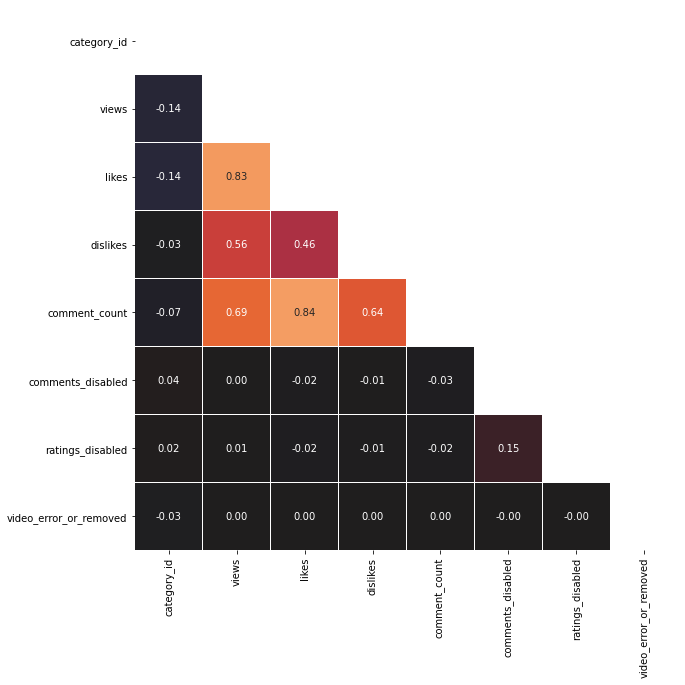

In [4]:
pandasExploratoryData(df,['cat', 'num', 'gen', 'missing','corr'])

## Task 1: Correlation between likes and views

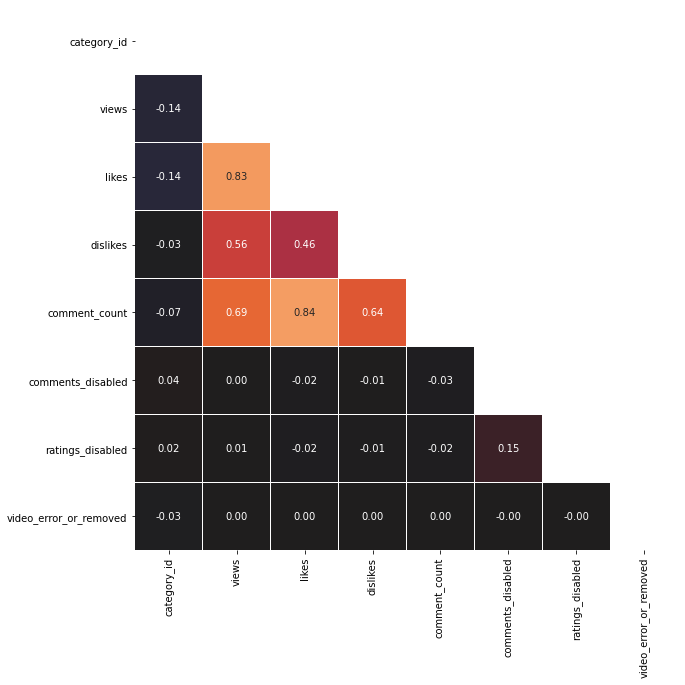

In [5]:
filterFeature = ['likes',.3]
correlationHeatmap(df,half=True)

## Task 2: distribution of attributes like "views", "comments" and "likes"

In [6]:
# set index allows 
dfMainKPI = df[['video_id','likes','dislikes','comment_count']].set_index('video_id')
dfMainKPI.head()

,likes,dislikes,comment_count
video_id,,,
n1WpP7iowLc,787425,43420,125882
0dBIkQ4Mz1M,127794,1688,13030
5qpjK5DgCt4,146035,5339,8181
d380meD0W0M,132239,1989,17518
2Vv-BfVoq4g,1634130,21082,85067


In [7]:
# need to play with bins
#sns.histplot(data=dfMainKPI, x="dislikes")

## Task 3: predict numbers of likes
Refesher on scikit-learn and pipelines. Because we are asked to predict this is a regression

In [8]:
#limited to 1000 values otherwise I stackoverflow
df = df[:8000]

In [9]:
Y = df.likes
df = df.drop('likes',axis=1) 

In [10]:
Y.shape

(8000,)

In [11]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


In [12]:
from sklearn.preprocessing import FunctionTransformer

# columns list for cat and num dtypes
catFeats = df.dtypes[df.dtypes == 'object'].index.tolist()
numFeats = df.dtypes[~df.dtypes.index.isin(catFeats)].index.tolist()

# methods for Function Transformer 
def numFeat(df):
    return data[numFeats]

def catFeat(df):
    return df[catFeats]


#! need to review and learn more about FunctionTransformer
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html#sklearn.preprocessing.FunctionTransformer
# This goes without says that I also must review fit and transform
keepNum = FunctionTransformer(numFeat)
keepCat = FunctionTransformer(catFeat)

In [13]:
numFeats

['category_id',
 'views',
 'dislikes',
 'comment_count',
 'comments_disabled',
 'ratings_disabled',
 'video_error_or_removed']

In [14]:
from sklearn.experimental import enable_iterative_imputer

from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
# best reference for mixed data pipeline
#https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html

In [15]:
# preprocessing numeral pipeline
numericTransformer = Pipeline(steps=[
    #Multivariate imputer that estimates each feature from all the others.
    ('MICE', IterativeImputer(initial_strategy='median')),
    # Standardize features by removing the mean and scaling to unit variance
    ('scaler', StandardScaler())])
numericTransformer.steps.append(('kbest', SelectKBest(k=3)))

# preprocessing categorical pipeline
#simple Imputer is not really needed since there are nill NaNs
categoricalTransformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing'))])
# dummy cariable creation with one hot encoder
categoricalTransformer.steps.append(['ohc',OneHotEncoder(handle_unknown='ignore')])
# Dense Transformer (.todense)()) needed after onehotencoder
categoricalTransformer.steps.append(['to_dense',ToDenseTransformer()])
# we only want the PCAs with the most variance
categoricalTransformer.steps.append(['pca',PCA(n_components=3)])

In [16]:
# combining both preprocessors
preprocessor = ColumnTransformer(transformers=[
        ('num', numericTransformer, numFeats),
        ('cat', categoricalTransformer, catFeats)])

In [17]:
# very usefull pipeline visualization
from sklearn import set_config
set_config(display='diagram')
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('MICE',
                                                  IterativeImputer(initial_strategy='median')),
                                                 ('scaler', StandardScaler()),
                                                 ('kbest', SelectKBest(k=3))]),
                                 ['category_id', 'views', 'dislikes',
                                  'comment_count', 'comments_disabled',
                                  'ratings_disabled',
                                  'video_error_or_removed']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ['ohc',
                                                  OneHotEncoder(handle_unknown='ignore')],
                                                 ['to_dense',
                                                  <customPandas.ToDenseTransformer object at 0x7ff3d0a2f550>],
                                                 ['pca', PCA(n_components=3)]]),
                                 ['video_id', 'trending_date', 'title',
                                  'channel_title', 'publish_time', 'tags',
                                  'thumbnail_link', 'description'])])

In [18]:
# model 
from sklearn.linear_model import BayesianRidge, Lasso, Ridge

In [19]:
from sklearn.model_selection import RandomizedSearchCV
regressors = [BayesianRidge(),Lasso(), Ridge()]

In [20]:
regressors

[BayesianRidge(), Lasso(), Ridge()]

In [21]:
[round(x,2) for x in np.linspace(start=0.01,stop =1,num=8)]

[0.01, 0.15, 0.29, 0.43, 0.58, 0.72, 0.86, 1.0]

In [22]:
# hyperparameter tuning for the Randomized Search
params = [{'regressors':[Lasso()],
'regressors__alpha' : [round(x,2) for x in np.linspace(start=0.01,stop =1,num=8)],
# preprocessing pipeline
'preprocessor__cat__pca__n_components':range(3,5,1),
'preprocessor__num__kbest__k':range(2,5,1)},

{'regressors':[Ridge()],
'regressors__alpha' : [round(x,2) for x in np.linspace(start=0.01,stop =1,num=8)],
# preprocessing pipeline
'preprocessor__cat__pca__n_components':range(3,5,1),
'preprocessor__num__kbest__k':range(2,5,1)
}]
# if looking for specific parameters use the get_params methods (e.g.Lasso().get_params())

In [23]:
baseModel = Pipeline([('preprocessor', preprocessor),
                      ('regressors', regressors[0])])

In [24]:
baseModel

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('MICE',
                                                                   IterativeImputer(initial_strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('kbest',
                                                                   SelectKBest(k=3))]),
                                                  ['category_id', 'views',
                                                   'dislikes', 'comment_count',
                                                   'comments_disabled',
                                                   'ratings_disabled',
                                                   'video_error_or_removed']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ['ohc',
                                                                   OneHotEncoder(handle_unknown='ignore')],
                                                                  ['to_dense',
                                                                   <customPandas.ToDenseTransformer object at 0x7ff3d0a2f550>],
                                                                  ['pca',
                                                                   PCA(n_components=3)]]),
                                                  ['video_id', 'trending_date',
                                                   'title', 'channel_title',
                                                   'publish_time', 'tags',
                                                   'thumbnail_link',
                                                   'description'])])),
                ('regressors', BayesianRidge())])

In [25]:
from sklearn.model_selection import train_test_split
# split of the datasla
X_train, X_test, y_train, y_test = train_test_split(df,Y,test_size=0.33, random_state=42)

In [26]:
tunedModel = RandomizedSearchCV(baseModel,params,verbose=1,n_jobs=-1,n_iter=150, cv=5,random_state=42).fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 10.4min finished


In [27]:
Lasso().get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [33]:
print("model score training data: %.3f" % tunedModel.score(X_train, y_train)) 
print("model score test data: %.3f" % tunedModel.score(X_test, y_test))
print(tunedModel.best_estimator_.get_params)
tunedModel.best_params_

model score training data: 0.916
model score test data: 0.825
<bound method Pipeline.get_params of Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('MICE',
                                                                   IterativeImputer(initial_strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('kbest',
                                                                   SelectKBest(k=4))]),
                                                  ['category_id', 'views',
                                                   'dislikes', 'comment_count',
                                                   'comments_disabled',
                                                   'ratings_disabled'

{'regressors__alpha': 0.86,
 'regressors': Ridge(alpha=0.86),
 'preprocessor__num__kbest__k': 4,
 'preprocessor__cat__pca__n_components': 4}

In [29]:
y_pred = tunedModel.predict(X_test)

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mean_absolute_error(y_test,y_pred)

21457.467670148548

In [31]:
mean_squared_error(y_test,y_pred)

2490402270.804261

<AxesSubplot:ylabel='Count'>

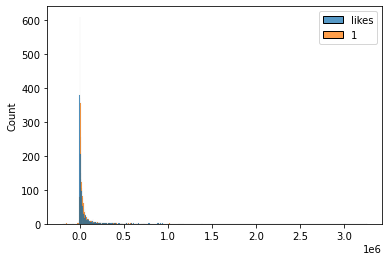

In [32]:
sns.histplot([y_test,y_pred])

## things to review
* fit/transfomr
* access the parameters of each "regressors"/steps in the pipeline